<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Trabajo%20Modulo%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-docx==0.8.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184488 sha256=b4e1e1d0eda68f0ad64686b25d3181e5b43e76b5640ba33abeb24cbc7579701d
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [6]:
!pip install nltk

In [29]:
!pip install spacy

In [42]:
!pip install textblob

In [45]:
!pip install scikit-learn

In [46]:
import requests
from docx import Document
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from nltk.stem import PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
nltk.download('punkt_tab')
nltk.download('stopwords')
!python -m spacy download en_core_web_sm
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [3]:
# Descargar el documento
def download_file(url, local_path):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
        with open(local_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

# Cargar el archivo .docx
def extract_text_from_docx(file_path):
    document = Document(file_path)
    full_text = []
    for para in document.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

url = 'https://github.com/melirandazzo/trabajo_ciencia_datos/raw/main/Carta_natal.docx'
local_file_path = 'Carta_natal.docx'
download_file(url, local_file_path)

# Ruta del archivo .docx (local path)
file_path = local_file_path

# Extraer y mostrar el texto
extracted_text = extract_text_from_docx(file_path)
#print(extracted_text)


In [13]:
from docx import Document
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocesar el texto: limpieza y tokenización
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Remover caracteres no alfabéticos
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


# Preprocesar el texto y mostrar los tokens
preprocessed_tokens = preprocess_text(extracted_text)
print("\nTokens preprocesados:")
print(preprocessed_tokens)

# Opcional: Guardar los tokens en un archivo .txt
with open('preprocessed_output.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(preprocessed_tokens))



Tokens preprocesados:
['st', 'house', 'ascendant', 'asc', 'physical', 'personality', 'ascendant', 'asc', 'symbolizes', 'basic', 'personality', 'traits', 'physical', 'appearance', 'temperament', 'behaviour', 'relationship', 'life', 'first', 'impression', 'person', 'gives', 'ascendant', 'capricorn', 'capricorn', 'ruler', 'saturn', 'people', 'capricorn', 'ascendant', 'must', 'first', 'become', 'aware', 'two', 'opposing', 'sides', 'one', 'obedience', 'performing', 'duties', 'properly', 'need', 'manage', 'energy', 'well', 'requires', 'discipline', 'selfcontrol', 'must', 'achieve', 'social', 'prestige', 'recognition', 'side', 'ability', 'organize', 'practical', 'matters', 'achieve', 'goals', 'also', 'ability', 'enjoy', 'sensual', 'pleasures', 'ruler', 'ascendant', 'saturn', 'people', 'tend', 'act', 'slowly', 'caution', 'avoid', 'kind', 'control', 'love', 'solitude', 'hate', 'crowds', 'want', 'stand', 'isolate', 'others', 'actions', 'valued', 'time', 'may', 'become', 'politicians', 'consulta


Palabras más frecuentes:
[('people', 128), ('house', 48), ('separating', 48), ('life', 39), ('often', 39), ('aspect', 39), ('venus', 34), ('sun', 33), ('saturn', 29), ('also', 28)]


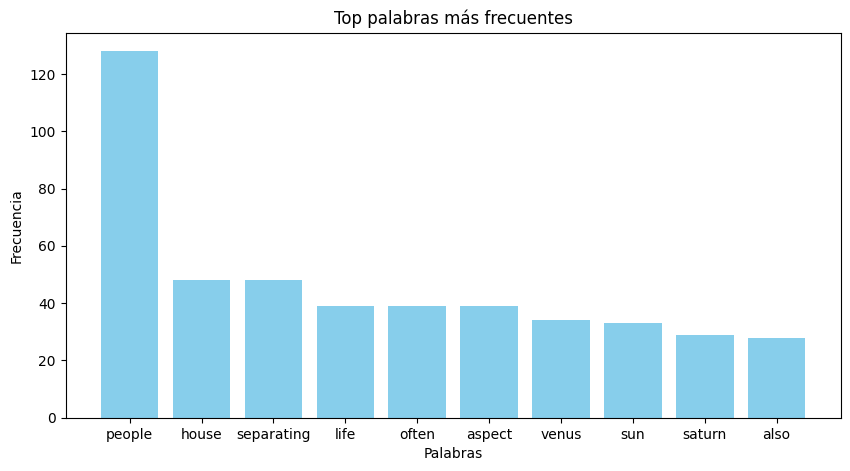

In [15]:
# Análisis de frecuencia de palabras
def get_most_frequent_words(tokens, n=10):
    word_freq = Counter(tokens)
    most_common = word_freq.most_common(n)
    return most_common

    # Visualizar palabras más frecuentes
def plot_most_frequent_words(word_freq):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title('Top palabras más frecuentes')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.show()

    # Obtener y mostrar las palabras más frecuentes
most_frequent_words = get_most_frequent_words(preprocessed_tokens)
print("\nPalabras más frecuentes:")
print(most_frequent_words)

# Visualizar las palabras más frecuentes
plot_most_frequent_words(most_frequent_words)

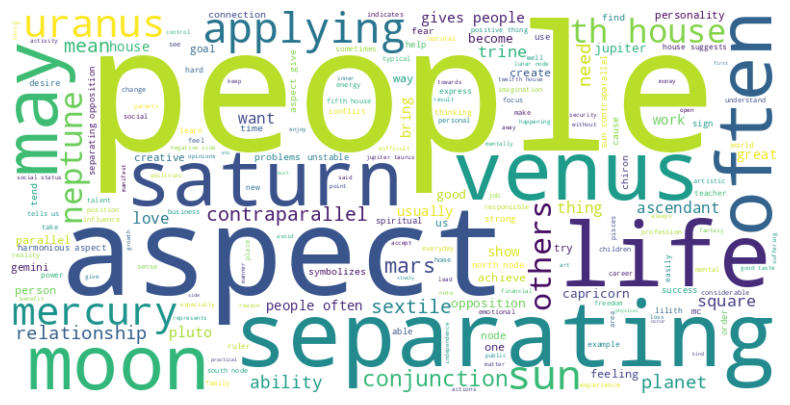

In [18]:
# Visualizar palabras con una nube de palabras
def plot_wordcloud(tokens):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # Visualizar las palabras con una nube de palabras
plot_wordcloud(preprocessed_tokens)


Frecuencia de signos zodiacales:
Counter({'capricorn': 11, 'gemini': 9, 'taurus': 5, 'pisces': 5, 'libra': 3, 'sagittarius': 3, 'scorpio': 3, 'aries': 2, 'virgo': 2})


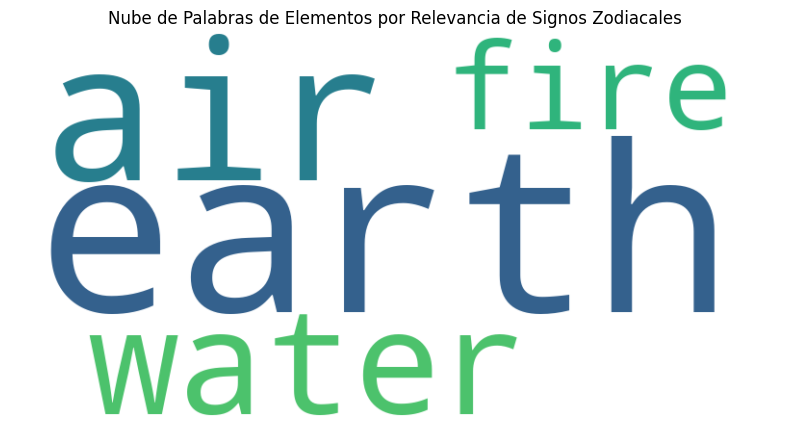

In [28]:
# Lista de signos zodiacales y sus elementos
zodiac_signs = {
    'aries': 'fire', 'taurus': 'earth', 'gemini': 'air', 'cancer': 'water',
    'leo': 'fire', 'virgo': 'earth', 'libra': 'air', 'scorpio': 'water',
    'sagittarius': 'fire', 'capricorn': 'earth', 'aquarius': 'air', 'pisces': 'water'
}

# Filtrar y contar signos zodiacales
def filter_and_count_zodiac_signs(tokens):
    filtered_signs = [word for word in tokens if word in zodiac_signs]
    sign_counts = Counter(filtered_signs)
    return sign_counts

    # Crear y mostrar una nube de palabras de los elementos según la frecuencia de los signos
def plot_element_wordcloud(sign_counts):
    # Convertir los signos a sus elementos correspondientes
    element_counts = Counter()
    for sign, count in sign_counts.items():
        element = zodiac_signs[sign]
        element_counts[element] += count

  # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(element_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras de Elementos por Relevancia de Signos Zodiacales')
    plt.show()

# Filtrar y contar signos zodiacales
zodiac_sign_counts = filter_and_count_zodiac_signs(preprocessed_tokens)
print("\nFrecuencia de signos zodiacales:")
print(zodiac_sign_counts)

# Visualizar la nube de palabras de los elementos
plot_element_wordcloud(zodiac_sign_counts)

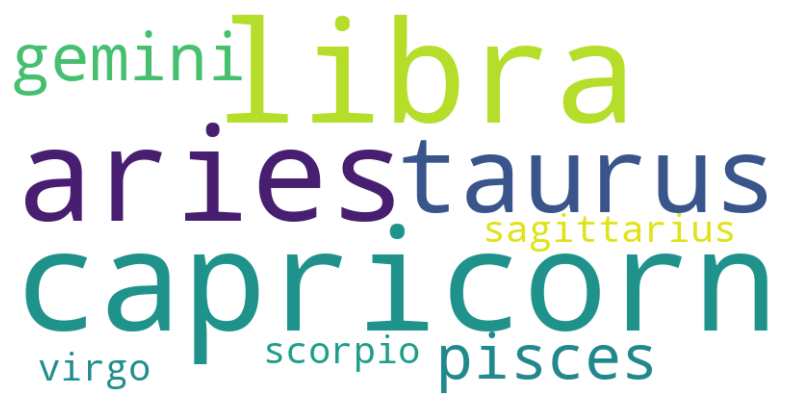

In [27]:
plot_wordcloud(zodiac_sign_counts)

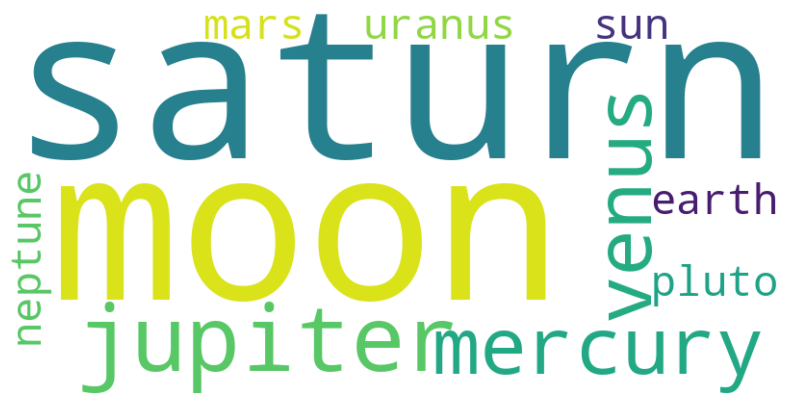

In [26]:
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto', 'moon', 'sun']
# Filtrar y contar signos zodiacales
def filter_and_count_planets(tokens):
    filtered_signs = [word for word in tokens if word in planets]
    sign_counts = Counter(filtered_signs)
    return sign_counts

plot_wordcloud(filter_and_count_planets(preprocessed_tokens))

In [34]:
# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# **Lematización con spaCy**
doc = nlp(extracted_text)
lemmatized_text = [(token.text, token.lemma_) for token in doc]
print("Lematización:")
for word, lemma in lemmatized_text:
    print(f"{word} -> {lemma}")

Streaming output truncated to the last 5000 lines.
° -> °
22 -> 22
’ -> '
, -> ,
Applying -> apply
) -> )

 -> 

Opposition -> Opposition
Mercury -> Mercury
( -> (
5 -> 5
° -> °
54 -> 54
’ -> '
, -> ,
Separating -> Separating
) -> )

 -> 

Opposition -> Opposition
Venus -> Venus
( -> (
5 -> 5
° -> °
56 -> 56
’ -> '
, -> ,
Separating -> Separating
) -> )

 -> 

Conjunction -> Conjunction
Uranus -> Uranus
( -> (
0 -> 0
° -> °
32 -> 32
’ -> '
, -> ,
Applying -> apply
) -> )

 -> 

Contra -> Contra
- -> -
Parallel -> Parallel
Sun -> Sun
( -> (
0 -> 0
° -> °
43 -> 43
’ -> '
) -> )

 -> 

Contra -> Contra
- -> -
Parallel -> Parallel
Venus -> Venus
( -> (
0 -> 0
° -> °
53 -> 53
’ -> '
) -> )

 -> 

Parallel -> Parallel
Neptune -> Neptune
( -> (
0 -> 0
° -> °
10 -> 10
’ -> '
) -> )


  -> 

 
Uranus -> Uranus
- -> -
Originality -> Originality
, -> ,
freedom -> freedom
, -> ,
revolution -> revolution

 -> 

Uranus -> Uranus
is -> be
the -> the
power -> power
of -> of
awakening -> awakening
, ->

In [38]:
# **Stemming con NLTK**
ps = PorterStemmer()
stemmed_text = [ps.stem(word) for word in preprocessed_tokens]
print("\nStemming:")
print(stemmed_text)


Stemming:
['st', 'hous', 'ascend', 'asc', 'physic', 'person', 'ascend', 'asc', 'symbol', 'basic', 'person', 'trait', 'physic', 'appear', 'tempera', 'behaviour', 'relationship', 'life', 'first', 'impress', 'person', 'give', 'ascend', 'capricorn', 'capricorn', 'ruler', 'saturn', 'peopl', 'capricorn', 'ascend', 'must', 'first', 'becom', 'awar', 'two', 'oppos', 'side', 'one', 'obedi', 'perform', 'duti', 'properli', 'need', 'manag', 'energi', 'well', 'requir', 'disciplin', 'selfcontrol', 'must', 'achiev', 'social', 'prestig', 'recognit', 'side', 'abil', 'organ', 'practic', 'matter', 'achiev', 'goal', 'also', 'abil', 'enjoy', 'sensual', 'pleasur', 'ruler', 'ascend', 'saturn', 'peopl', 'tend', 'act', 'slowli', 'caution', 'avoid', 'kind', 'control', 'love', 'solitud', 'hate', 'crowd', 'want', 'stand', 'isol', 'other', 'action', 'valu', 'time', 'may', 'becom', 'politician', 'consult', 'engin', 'etc', 'main', 'featur', 'endur', 'ruler', 'ascend', 'saturn', 'capricorn', 'peopl', 'rais', 'slowli'

In [41]:
# @title
from nltk import pos_tag
# **POS Tagging con NLTK**
pos_tags = pos_tag(preprocessed_tokens)
print("\nPOS Tagging:")
for word, tag in pos_tags:
    print(f"{word} -> {tag}")


POS Tagging:
st -> NN
house -> NN
ascendant -> JJ
asc -> JJ
physical -> JJ
personality -> NN
ascendant -> NN
asc -> NN
symbolizes -> VBZ
basic -> JJ
personality -> NN
traits -> NNS
physical -> JJ
appearance -> NN
temperament -> NN
behaviour -> NN
relationship -> NN
life -> NN
first -> JJ
impression -> NN
person -> NN
gives -> VBZ
ascendant -> JJ
capricorn -> JJ
capricorn -> VBN
ruler -> NN
saturn -> NN
people -> NNS
capricorn -> VBP
ascendant -> JJ
must -> MD
first -> RB
become -> VB
aware -> JJ
two -> CD
opposing -> VBG
sides -> NNS
one -> CD
obedience -> NN
performing -> VBG
duties -> NNS
properly -> RB
need -> VBP
manage -> NN
energy -> NN
well -> RB
requires -> VBZ
discipline -> JJ
selfcontrol -> NN
must -> MD
achieve -> VB
social -> JJ
prestige -> NN
recognition -> NN
side -> NN
ability -> NN
organize -> VB
practical -> JJ
matters -> NNS
achieve -> VBP
goals -> NNS
also -> RB
ability -> NN
enjoy -> VBP
sensual -> JJ
pleasures -> NNS
ruler -> VBP
ascendant -> JJ
saturn -> NN
peopl

In [44]:
# Crear un objeto TextBlob para el análisis
blob = TextBlob(extracted_text)

# Obtener el análisis de sentimiento
sentimiento = blob.sentiment

# Mostrar los resultados
print(f"Polaridad: {sentimiento.polarity}")
print(f"Sujeción: {sentimiento.subjectivity}")

Polaridad: 0.13688797464068223
Sujeción: 0.5303579698480421


In [47]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Esto elimina palabras comunes (como "the", "and", etc.)

# Ajustar el modelo y transformar el texto
tfidf_matrix = vectorizer.fit_transform([extracted_text])

# Obtener los nombres de las características (palabras)
palabras = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF en un formato más legible
tfidf_scores = tfidf_matrix.toarray()

# Mostrar los resultados (palabras y sus respectivos TF-IDF scores)
for palabra, score in zip(palabras, tfidf_scores[0]):
    print(f"{palabra}: {score:.4f}")

01: 0.0141
03: 0.0141
10: 0.0283
10th: 0.0283
12: 0.0141
12th: 0.0283
14: 0.0141
16: 0.0141
18: 0.0188
1st: 0.0094
21: 0.0141
22: 0.0283
23: 0.0141
25: 0.0141
26: 0.0283
27: 0.0141
28: 0.0141
2nd: 0.0047
305: 0.0047
31: 0.0141
32: 0.0141
33: 0.0141
38: 0.0141
3rd: 0.0047
40: 0.0141
41: 0.0141
43: 0.0141
45: 0.0141
47: 0.0141
49: 0.0141
4th: 0.0141
50: 0.0141
53: 0.0283
54: 0.0283
55: 0.0141
56: 0.0141
5th: 0.0188
6th: 0.0094
7th: 0.0047
8th: 0.0047
9th: 0.0047
abilities: 0.0188
ability: 0.0753
able: 0.0330
accept: 0.0188
accepted: 0.0047
accepting: 0.0047
accordance: 0.0047
according: 0.0047
achieve: 0.0471
acknowledged: 0.0047
acquaintances: 0.0047
act: 0.0047
actions: 0.0188
active: 0.0047
activities: 0.0141
activity: 0.0188
actors: 0.0094
adam: 0.0094
adapt: 0.0047
administrators: 0.0047
advantages: 0.0094
adventurous: 0.0094
affairs: 0.0094
affected: 0.0047
affection: 0.0094
affectionate: 0.0047
affects: 0.0094
afraid: 0.0141
ahead: 0.0047
aim: 0.0047
air: 0.0094
alcohol: 0.0094
al